# Understanding V-Structures and the Critical Role They Play in Causal Validation

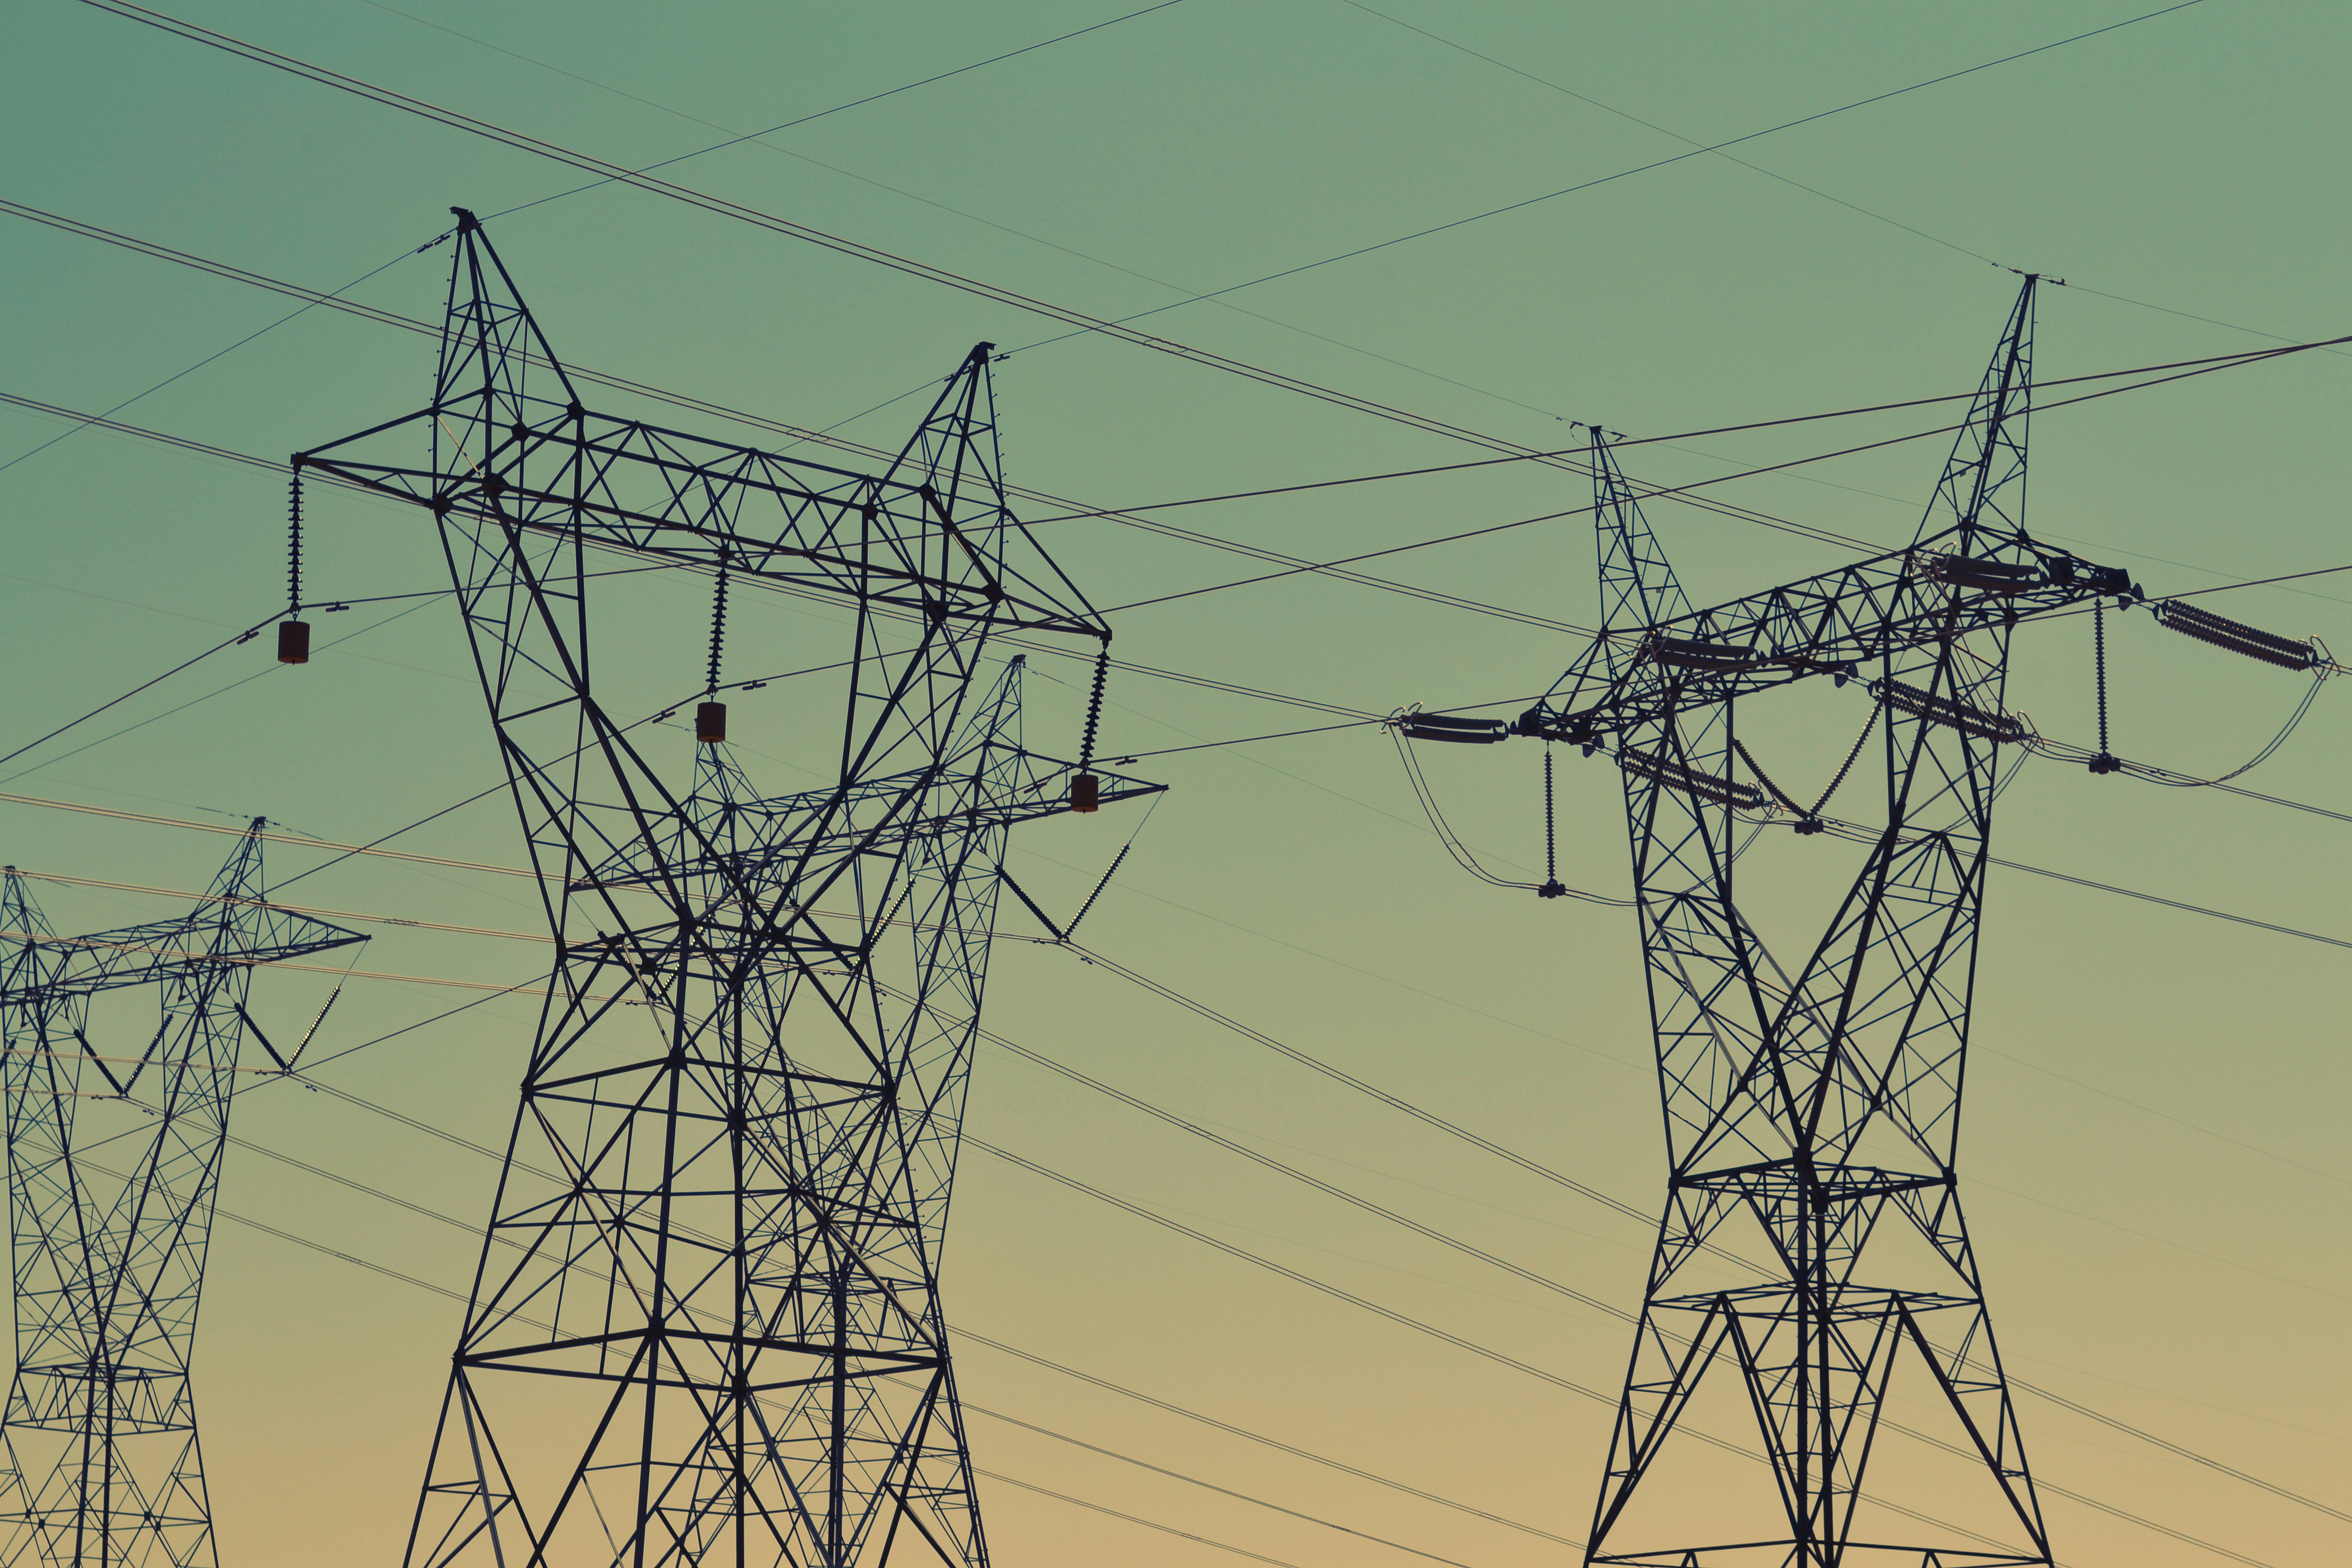
Photo by <a href="https://unsplash.com/@fresonneveld?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Fré Sonneveld</a> on <a href="https://unsplash.com/photos/black-transmission-towers-under-green-sky-q6n8nIrDQHE?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

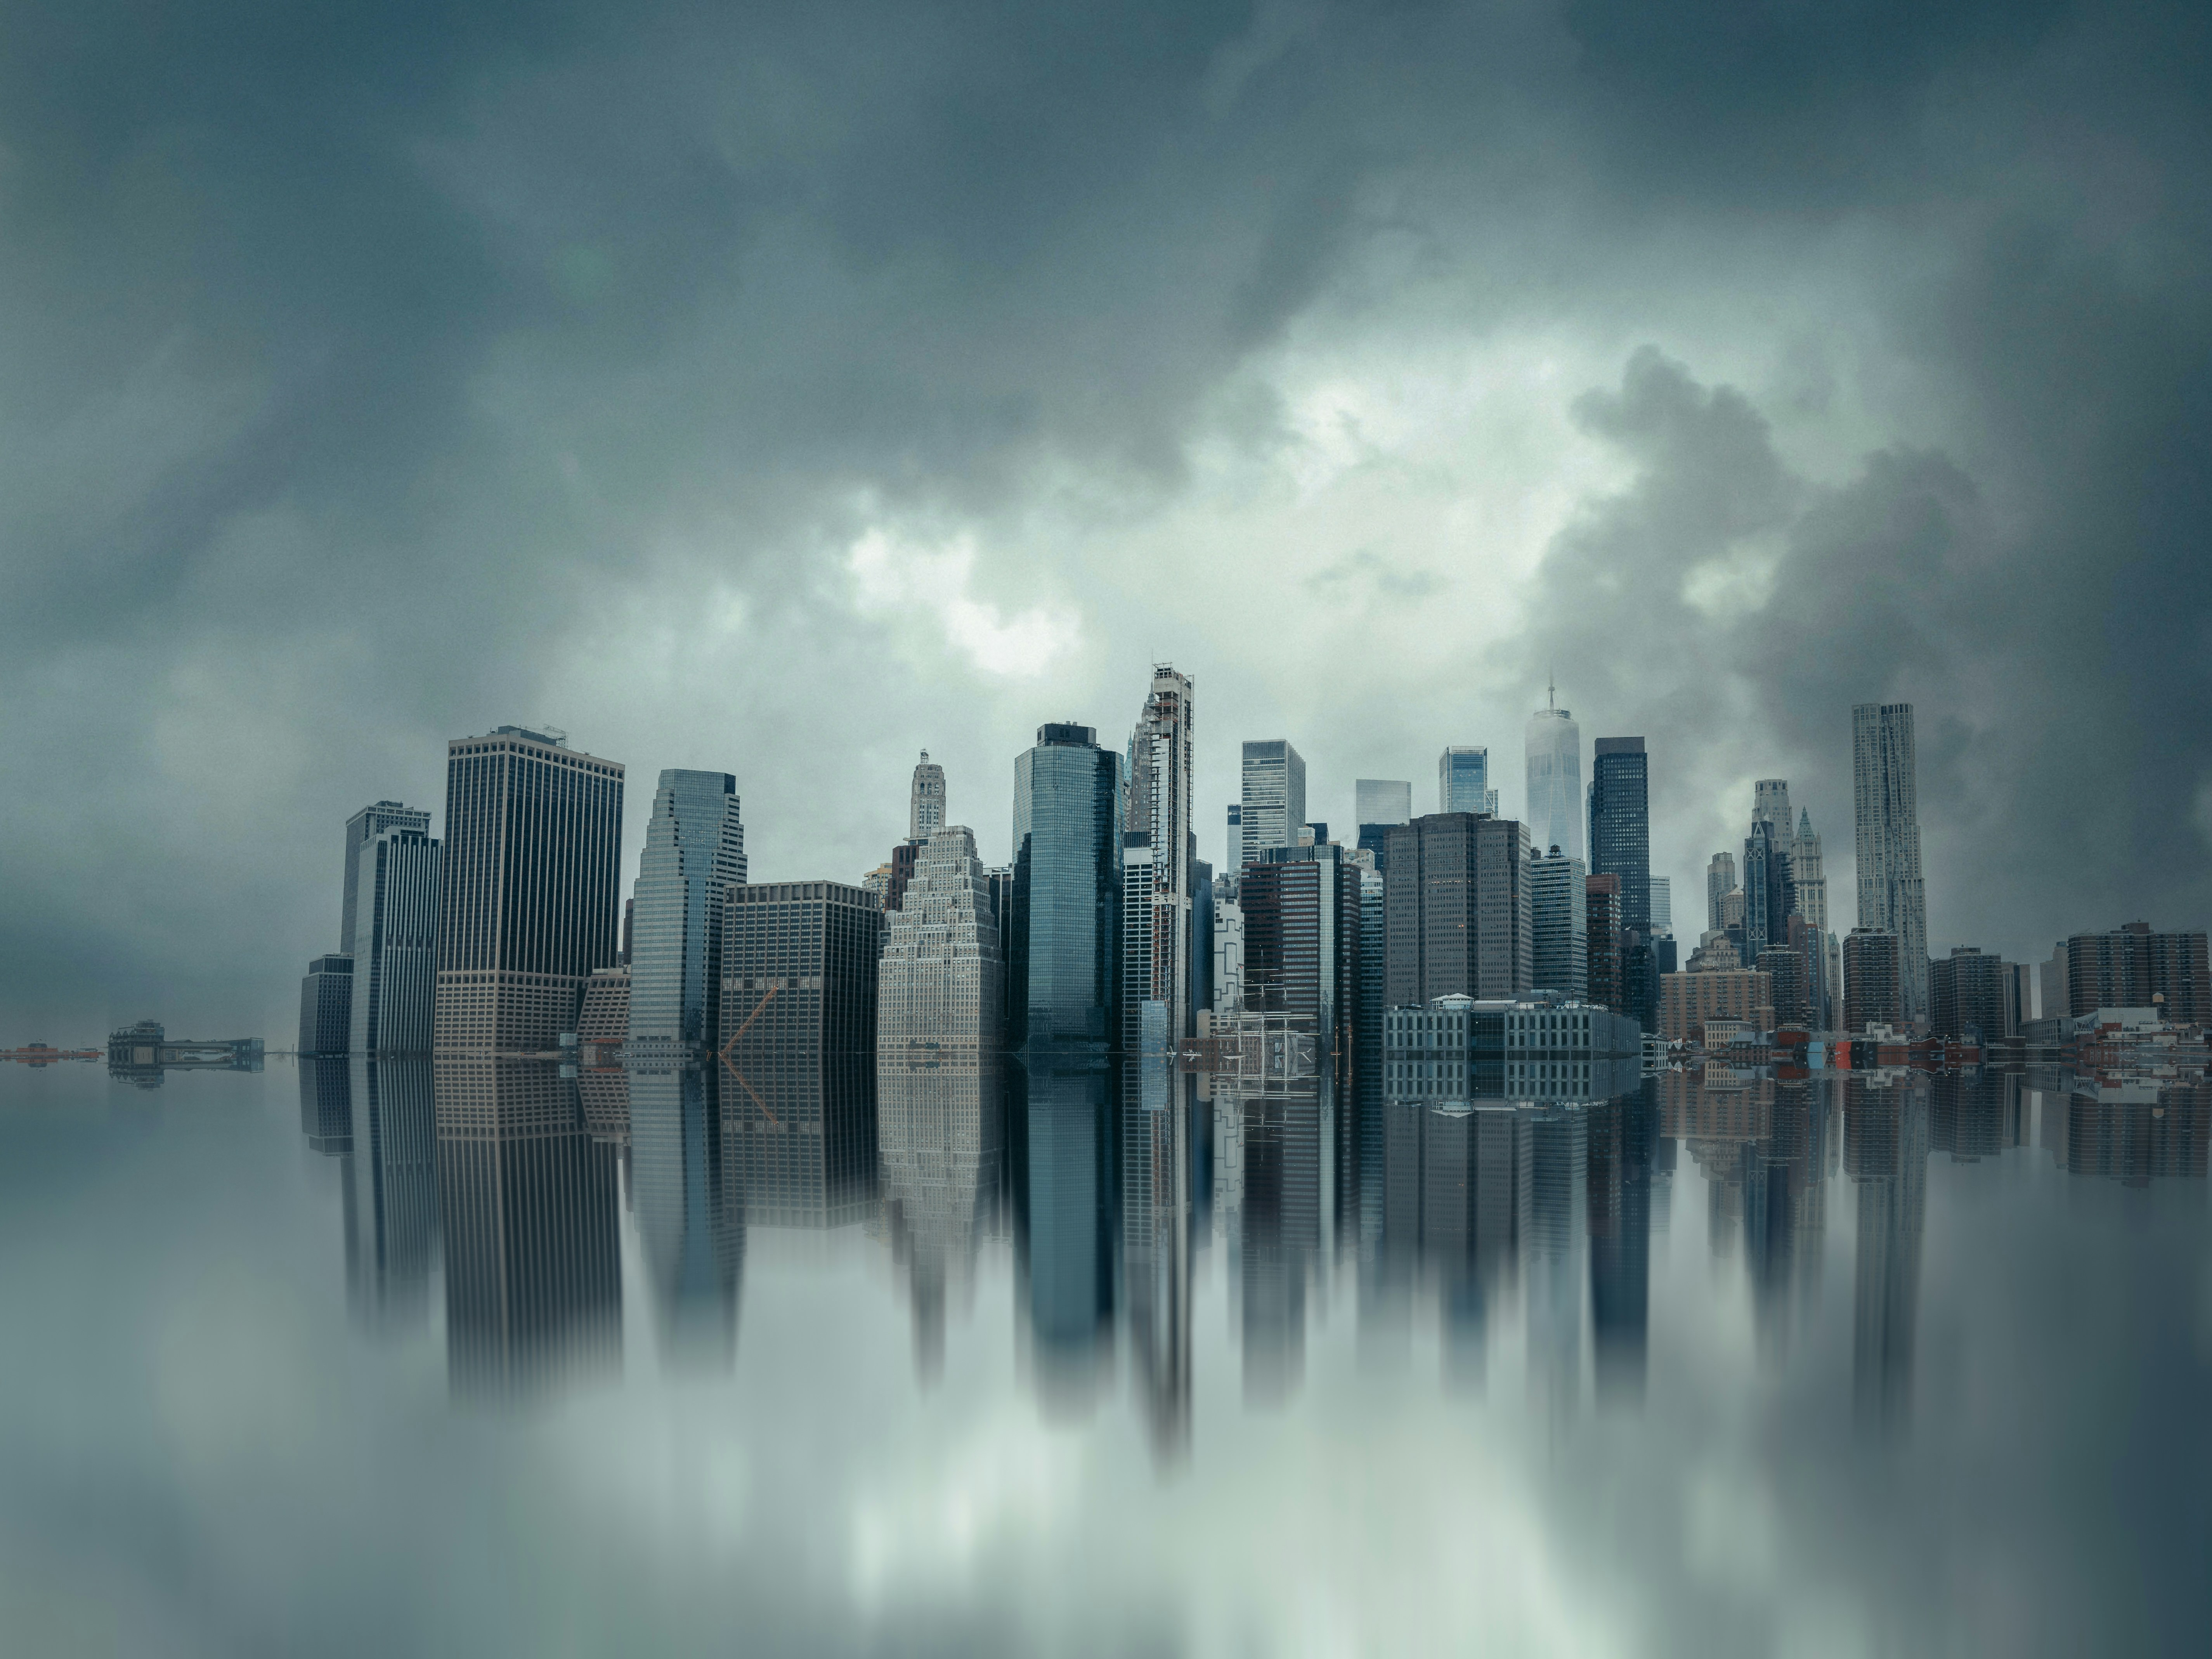
Photo by <a href="https://unsplash.com/@golypal?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Pavel Golasowski</a> on <a href="https://unsplash.com/photos/a-city-skyline-is-shown-in-the-middle-of-a-body-of-water-wyoqwnBOSB8?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

In [1]:
import pandas as pd
import json

from itertools import combinations

import sys
sys.path.insert(1, r'C:\\Users\\GHarr\\OneDrive - Lincoln College\\Python Projects\Data Science\\ghlibrary')

import dataframe_tools # type: ignore
from dag_tools import DirectedAcyclicGraph # type: ignore
from causal_tools import CausalModel # type: ignore

from icecream import ic

ic.disable()

## Introduction

Causal inference is an emerging field within machine learning that can move beyond predicting what could happen to explaining why it will happen and it doing so offers the promise of permanently resolving the underlying problem rather than dealing with the potential fallout.

To enable causal inference requires a visualisation of the cause-and-effect factors in a "Directed Acyclic Graph" or DAG which is typically developed by domain experts who have built up an informed view of the causality in a system.

A challenge with this approach is that the views of the domain experts can be flawed or biased and without an accurage DAG the causal models will be inaccurate and ineffective.

One specific problem within "causal validation" is detecting the direction of causality between two variables. For example it could be that studying for a management qualification "causes" promotion but it could be that newly promoted managers start a qualification to help develop their skills. In the real world if we can measure the timing that will help. For example if 90% of staff studied first and got promoted second the causality would become clear but all we had were the historical data indicating a correlation the direction of causality will not be clear.

### The Problem
Verifying the direction of causal links is difficult and on the dace of it looks impossible to do.

### The Opportunity
If an algorithm existed that could verify the direction of causal links it would add significant value causal inference by improving the accuracy of the DAG and hence the confidence in the predictions of causal models.

### The Way Forward
A specific type of junction within a DAG called V-structures can be used to indicate connections in a DAG which may be "reversed" i.e. pointing in the wrong direction.

In [2]:
# TODO: Don't forget Model Testing 10.ipynb in the main project!!!

## Getting Started

### Choosing a Directed Acyclic Graph

Let's start by choosing an entirely fictitious DAG that will be used through out the examples in the article. It is one of my favourites to work with because it is simple enough to use in testing but complex enough to contain all the variations that wil lbe found in more complex examples -

A complex DAG taken from 'Causal Inference in Statistics' that includes 5 colliders, 3 forks and a chain between the treatment and outcome


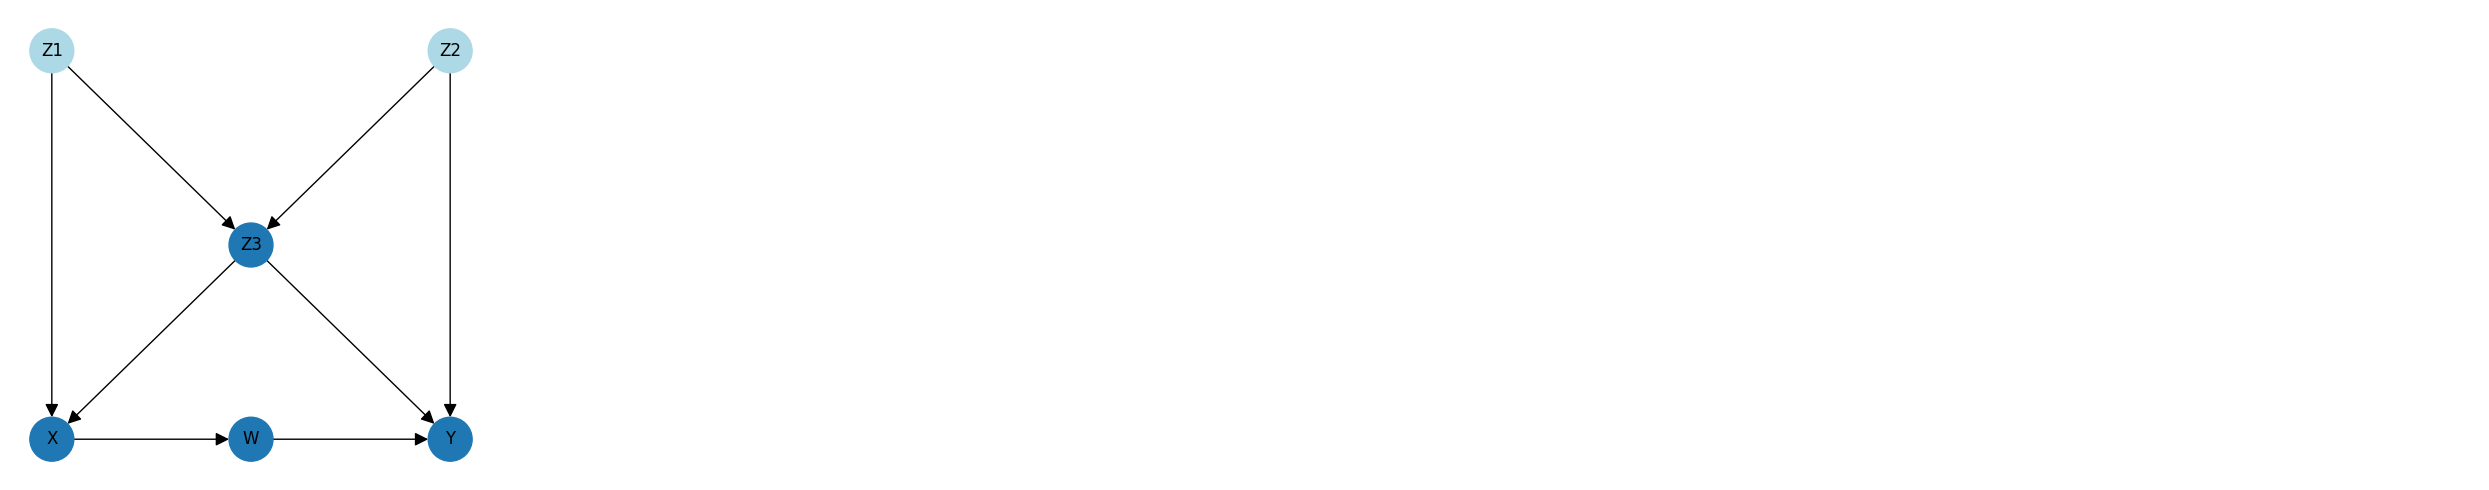

In [3]:
example_dag = DirectedAcyclicGraph.example_dags()["causal_inference_in_statistics_1"]
print(example_dag["description"])

dag = example_dag["dag"]

dag.draw(grid_size=5)

X is the treatment and Y is the outcome and the objective of causal inference is to ascertain the true and isolated effect of the treatment on the outcome independent of the effects of all the other variables.

It should be noted that in the real world X might represent taking a new drug, W might be the effect of the drug on blood pressure and Y might be the improvement in patient outcomes but for the purposes of the example I have just chosen letters.

### Generating the Test Data

In a real world example we would start with a set of data and the domain experts would use their expertise to produce a candidate DAG but in tests and examples the opposite is true. Firstly a DAG is selected based on its suitability to illustrate the examples and then a set of data is generated that fits the DAGs by randomly selecting weightings between each node and then creating data based on those weightings.

Here are the weightings selected to generate the data -

A complex DAG taken from 'Causal Inference in Statistics' that includes 5 colliders, 3 forks and a chain between the treatment and outcome


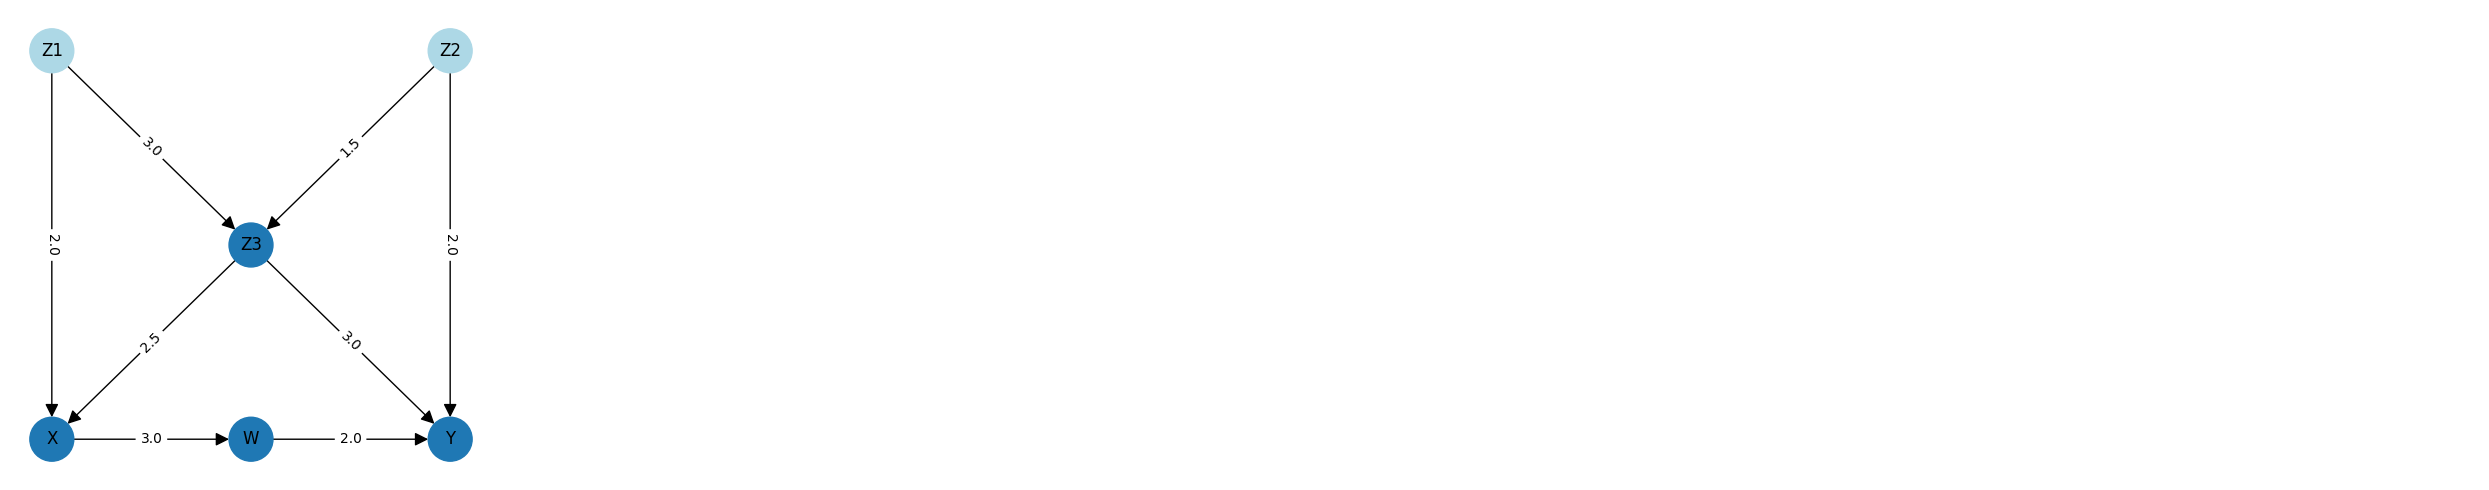

In [4]:
example_dag = DirectedAcyclicGraph.example_dags()["causal_inference_in_statistics_1"]
print(example_dag["description"])

dag = example_dag["dag"]

causal_model: CausalModel = CausalModel(dag=dag, random_state=1, allow_negative_coefficients=False)
causal_model.fit(X=None)
causal_model.data.head()

dag.draw(grid_size=5, labels=causal_model.edge_weightings)

In [5]:
causal_model.structural_equations

{'Z1': 'Z1 = np.random.normal(4.753198042323167, 1.720324493442158)',
 'Z2': 'Z2 = np.random.normal(3.289942920829799, 1.8849665188380633)',
 'Z3': 'Z3 = 3 x Z1 + 1.5 x Z2 + ε',
 'X': 'X = 2 x Z1 + 2.5 x Z3 + ε',
 'W': 'W = 3 x X + ε',
 'Y': 'Y = 2 x W + 2 x Z2 + 3 x Z3 + ε'}

That gives rise to the following set of structural equations, one equation for each node -

$$
Z1 \sim \mathcal{N}(4.75, 1.72^2) \\
Z2 \sim \mathcal{N}(3.29, 1.88^2) \\ 
$$

$$
Z3 = 3Z1 + 1.5Z2 + ε \\
X = 2Z1 + 2.5Z3 + ε \\
W = 3X + ε \\
Y = 2W + 2Z2 + 3Z3 + ε
$$

To complete the explanation all that is required is to understand the distinction between exogenous nodes / variables and endogenous variables / nodes. Exogenous nodes have no incoming causal arrows so in the example DAG the exogenous variables are Z1 and Z2 and the endogenous variables are X, W, Y and Z3. Exogenous variables must be assigned values randomly, usually by following a rule on a distribution.

The 6 structural equations (one for each node on the DAG) can therefore be fully explained and understood as follows ..

- Z1 is an exogenous variable (i.e. it has no inputs) that is normally distributed with a mean of 4.75 and a standard deviation of 1.72
- Z2 is an exogenous variable that is normally distributed with a mean of 3.29 and a standard deviation of 1.88

- Z3 = 3 X Z1 + 1.5 x Z2 + an error term
- X = 2 x Z1 + 2.5 x Z3 + an error term
- W = 3 x X + an error term
- Y = 2 x W + 2 x Z2 + 3 x Z3 + an error term

In [6]:
causal_model.data

Z1        Z2         Z3          X           W           Y
0    3.844571  0.441614  14.082635  40.234675  125.152689  311.667199
1    2.907344  1.647342   9.650501  36.438910  119.387876  264.935335
2    6.241980  1.659767  21.327016  65.882887  230.060538  513.139115
3    0.793805  4.437415   7.917180  19.562641   51.027281  205.545929
4    7.754840  4.348612  29.910789  89.727765  269.565371  666.055405
..        ...       ...        ...        ...         ...         ...
995  4.633421  5.904063  23.170104  67.904617  212.178882  465.996645
996  5.361970  4.212665  21.861101  63.392878  184.950162  489.524639
997  4.431575  3.740065  20.950905  62.155688  205.315468  507.154223
998  4.489582  2.445267  15.724477  50.845614  140.986912  262.874028
999  0.568494  2.138615   2.574758   3.798212    9.835761    6.258762

[1000 rows x 6 columns]

## The Apparent Imposibility of Detecting the Direction of Causality

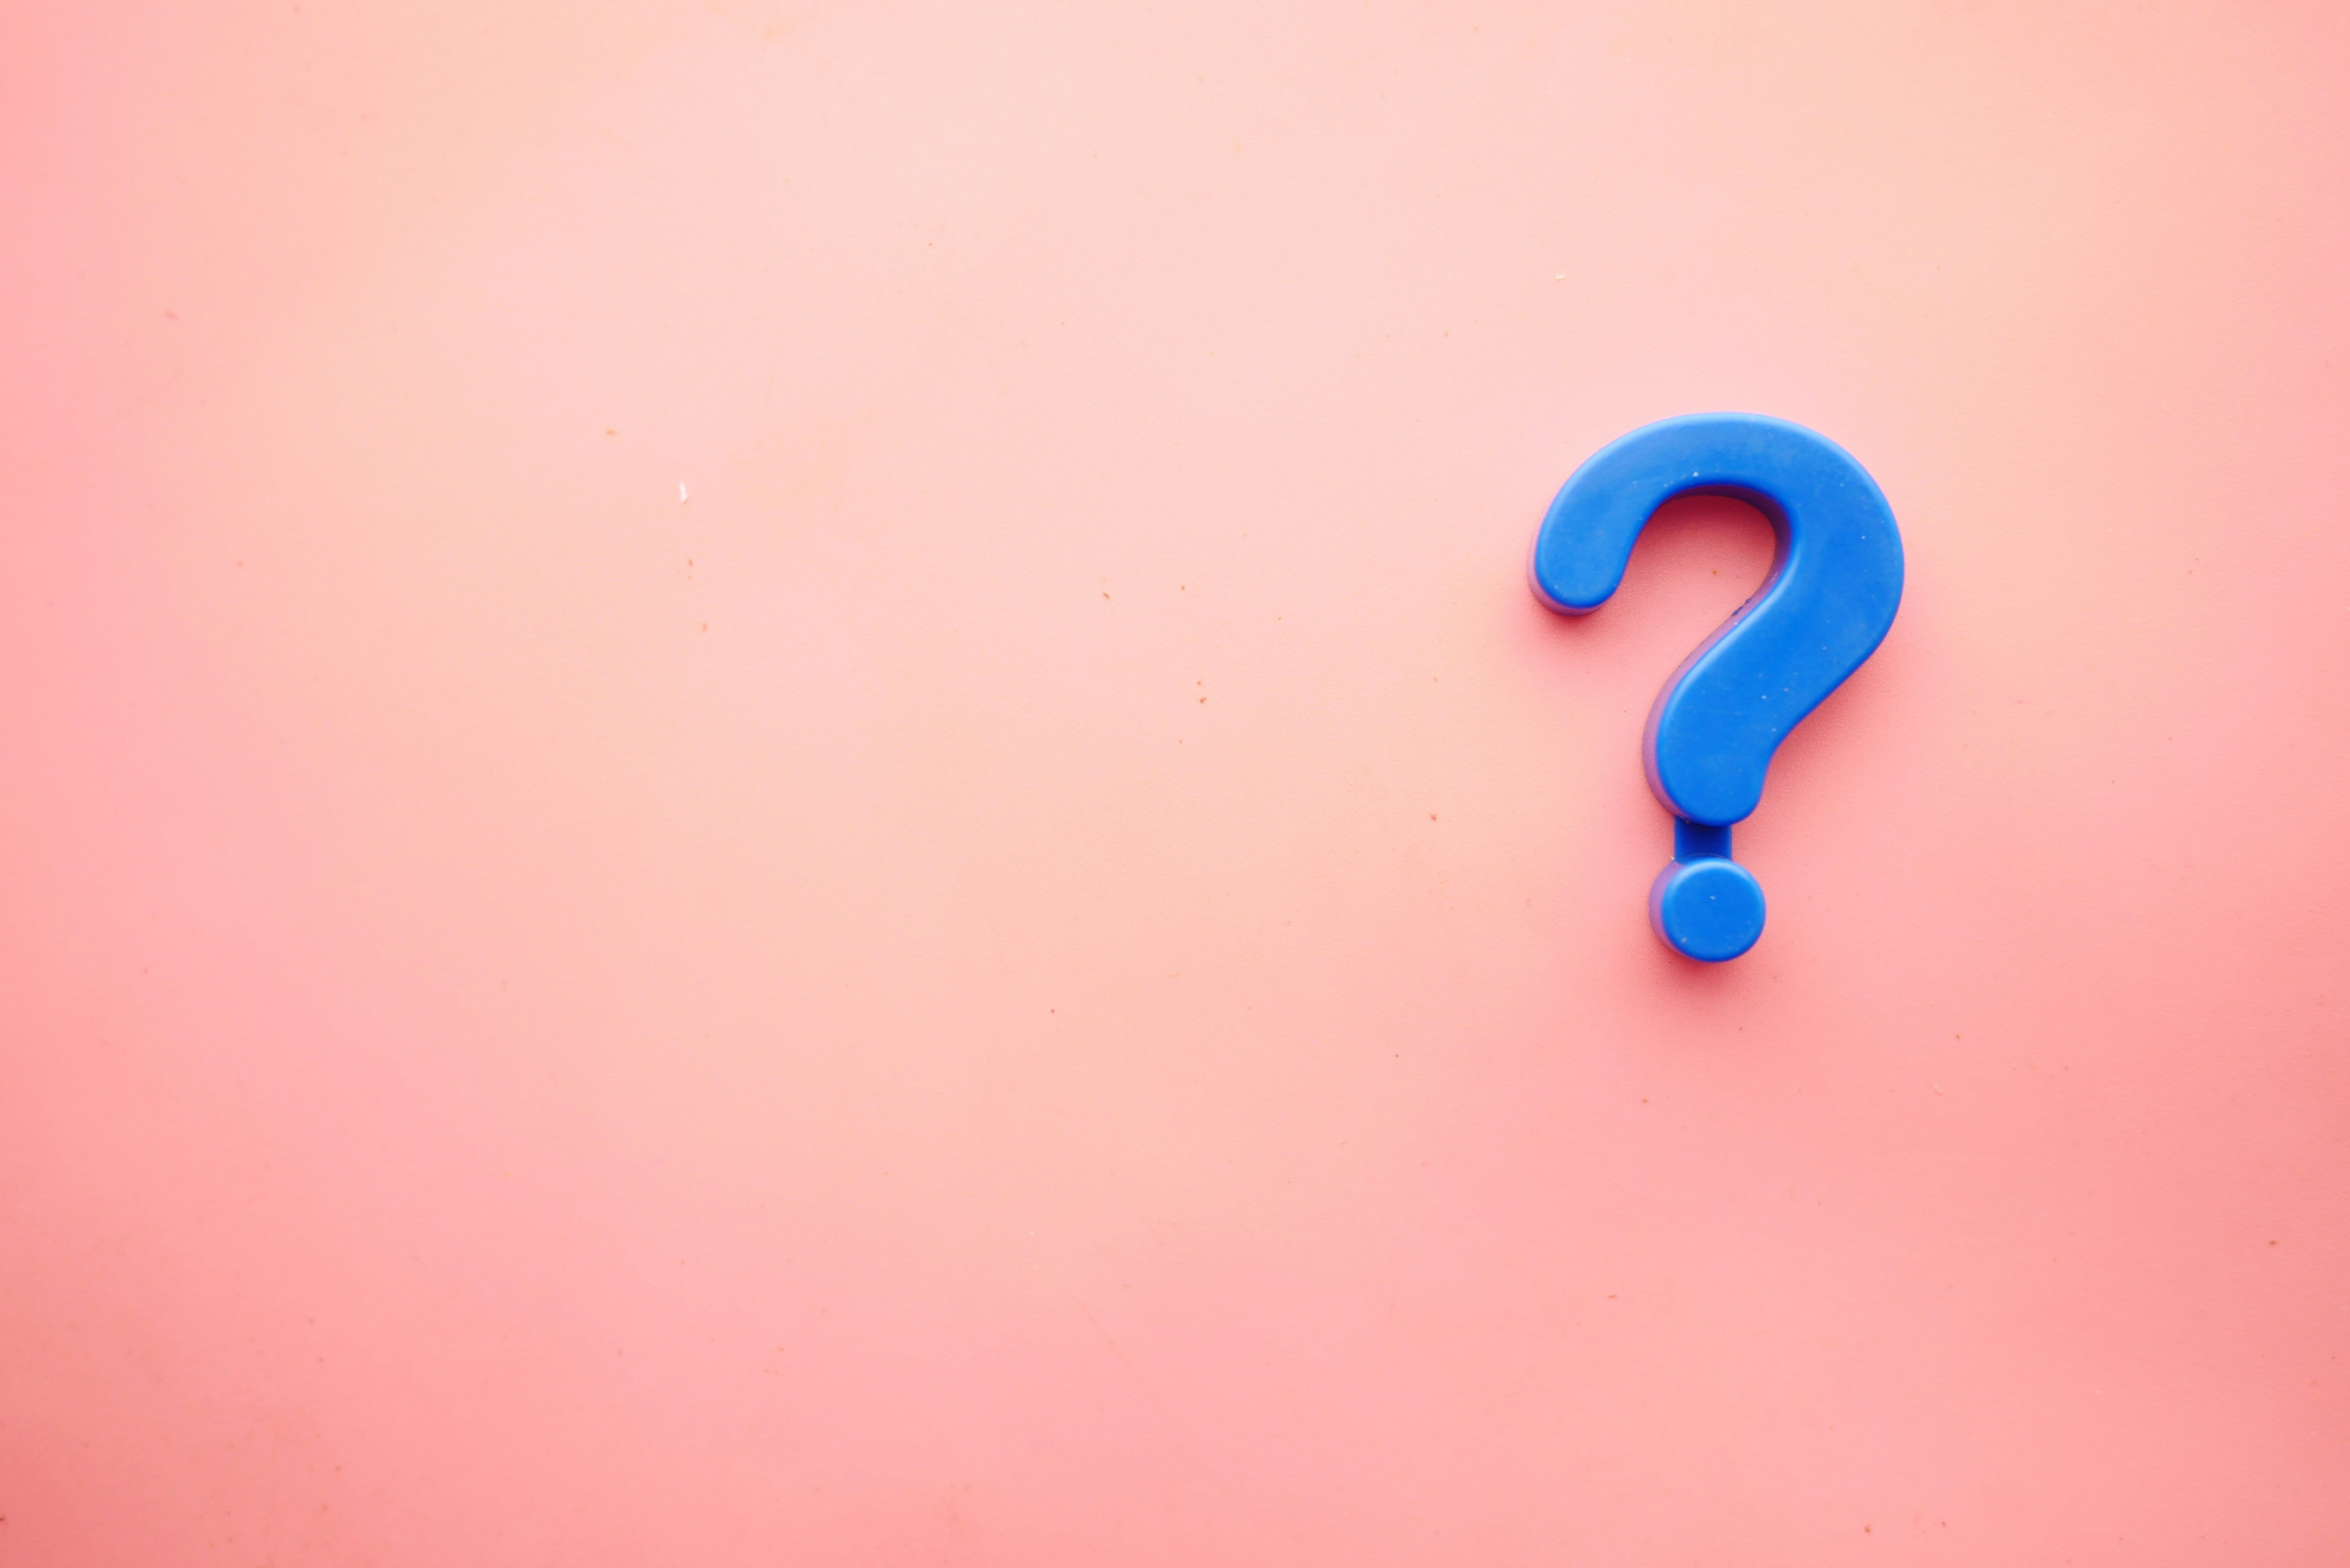
Photo by <a href="https://unsplash.com/@towfiqu999999?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Towfiqu barbhuiya</a> on <a href="https://unsplash.com/photos/a-blue-question-mark-on-a-pink-background-oZuBNC-6E2s?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

In a recent article I explored and explained the concept of paths through the DAG that are made up of junctions and if you are unfamiliar with these concepts this is essential reading to enable a full understanding of v-structures ...

https://medium.com/towards-data-science/understanding-junctions-chains-forks-and-colliders-and-the-role-they-play-in-causal-inference-211db6770e2f

That discussion included an exploration of "fork" junctions and how messages get through from the start to the end node. Consider the junction highlighted in the DAG below from X to Y through Z3 ...

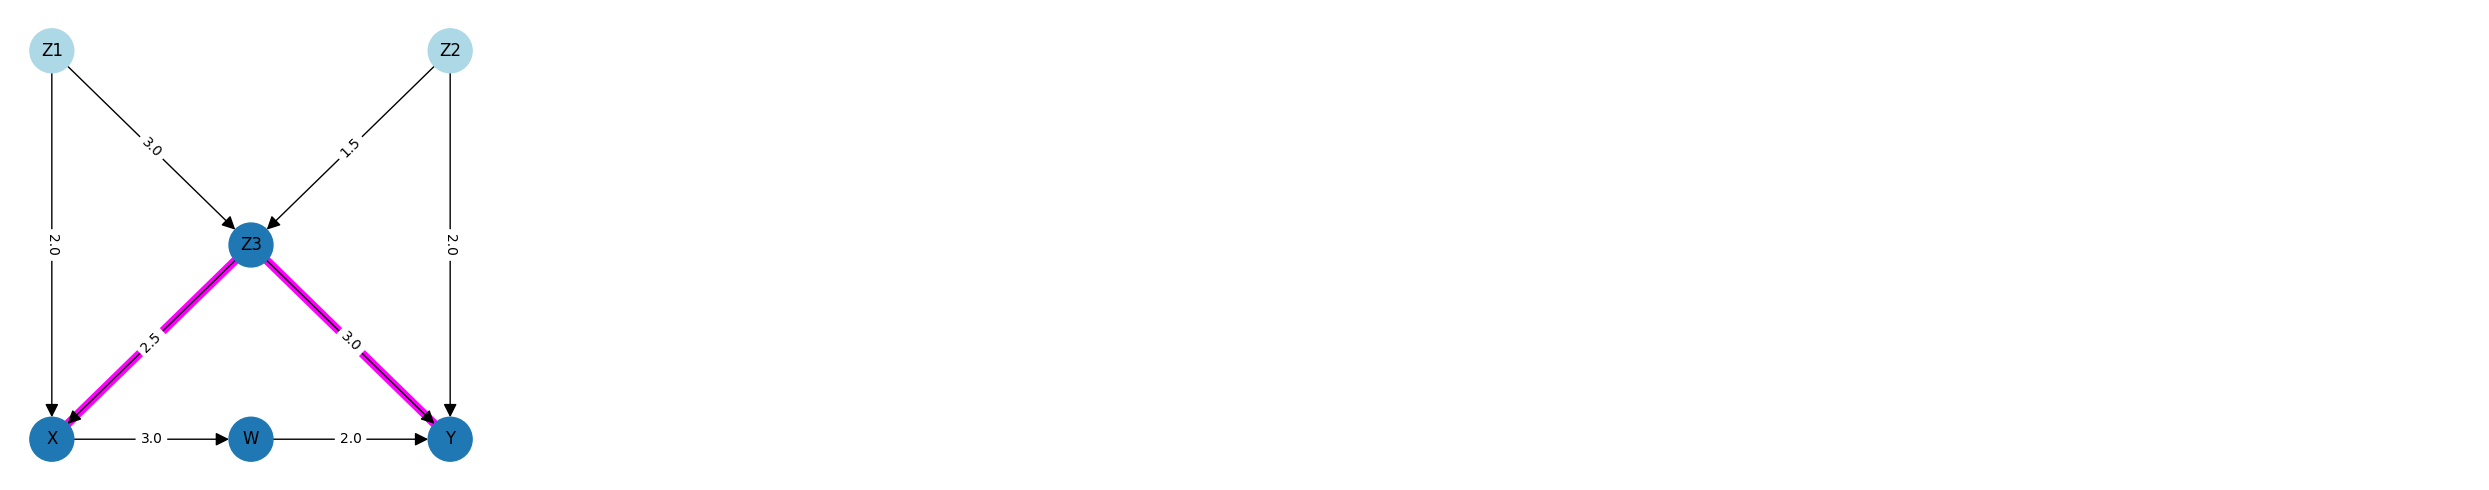

In [7]:
dag.draw_paths(paths=[dag.forks[1]], labels=causal_model.edge_weightings, cols=5)

Clearly "messages" can flow from Z3 to Y because Y = 3 x Z3 but the article on junctions explained that messages can also flow from X to Z3. 

This is because if X = 2.5 x Z3 it follows that Z3 = 1 / 2.5 x X dividing each side of the equation by 2.5 will resolve for X.

So if the relationship or multiplier between variables V1 and V2 is simply the inverse of the multiplier between V2 and V1 surely it is impossible to work out the direction if all we have is the data which always comes before the DAG in any real world causal problem?

This was my conclusion for a very long time. I had managed to work out some validation rules for identifying missing links and spurious links, but proving directionality of a link to identify links in the DAG which are in the wrong direction seemed impossible.

There are glimmers of solution in the literature using v-structures but they are faint and always incomplete. The remainder of this article aims to explore and combine those partial solutions to the point where an algorithm can be developed in Python to detect directional links in a DAG that are pointing in the wrong direction whe compared to the dataset the DAG is supposed to represent.

## A Basic Algorithm for Detecting the Direction of Causal Links